## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("mako")

output_path = "out"
labelpad = 15

In [2]:
papers_df = pd.read_csv(os.path.join(output_path, 's2_papers.csv'))
affiliations_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_affiliations.csv'))
acknowledgements_mentions_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_acknowledgements_mentions.csv'))

df = papers_df.merge(affiliations_df, on='corpusid', how='left')
df['has_company_mention'] = df['orgtype'] == 'company'

df.count()

corpusid                    78528
aclid_x                     78528
year                        78266
referencecount              78528
citationcount               78528
influentialcitationcount    78528
venue                       75972
title                       78528
url                         78528
s2fieldsofstudy             69953
acknowledgements_section     3153
affiliations                59939
publicationtype             73493
aclid_y                     78528
mentions_affiliations       24890
orgtype                     24890
hasorg                      78528
has_company_mention         78528
dtype: int64

In [3]:
# Get the number of unique affiliations for universities and companies using mentions_affiliations key

num_universities = df[df['orgtype'] == 'university'][df['mentions_affiliations'].notna()]['mentions_affiliations'].unique()
num_companies = df[df['orgtype'] == 'company'][df['mentions_affiliations'].notna()]['mentions_affiliations'].unique()

print(f"Number of unique universities: {len(num_universities)}")
print(f"Number of unique companies: {len(num_companies)}")

# load all universities from universities.csv and count the number of unique universities
all_universities = pd.read_csv('universities.csv').size
all_companies = 100

# Print relative amount of retrieved universities and companies
print(f"Relative retrieved companies: {len(num_companies) / all_companies}")
print(f"Relative retrieved universities: {len(num_universities) / all_universities}")

Number of unique universities: 1040
Number of unique companies: 45
Relative retrieved companies: 0.45
Relative retrieved universities: 0.03702912483087659


/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/4002997190.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_universities = df[df['orgtype'] == 'university'][df['mentions_affiliations'].notna()]['mentions_affiliations'].unique()
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/4002997190.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_companies = df[df['orgtype'] == 'company'][df['mentions_affiliations'].notna()]['mentions_affiliations'].unique()


In [4]:
(df['orgtype'] == 'university').sum() / df['orgtype'].count()

0.815548413017276

In [5]:
print()
print(df.count()['corpusid'])


78528


In [6]:
relative_presence = df[df['orgtype'] == 'company'].count()['mentions_affiliations'] / len(df['corpusid'].unique())
relative_presence_2021 = df[df['orgtype'] == 'company'][df['year'] == 2021].count()['mentions_affiliations'] / len(df[df['year'] == 2021]['corpusid'].unique())
relative_presence_2011 = df[df['orgtype'] == 'company'][df['year'] == 2011].count()['mentions_affiliations'] / len(df[df['year'] == 2011]['corpusid'].unique())

print("Relative presence of big tech companies: %.3f" % relative_presence)
print("Relative presence of big tech companies in 2021: %.3f" % relative_presence_2021)
print("Relative presence of big tech companies in 2011: %.3f" % relative_presence_2011)

Relative presence of big tech companies: 0.062
Relative presence of big tech companies in 2021: 0.149
Relative presence of big tech companies in 2011: 0.039


/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/753982479.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relative_presence_2021 = df[df['orgtype'] == 'company'][df['year'] == 2021].count()['mentions_affiliations'] / len(df[df['year'] == 2021]['corpusid'].unique())
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/753982479.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relative_presence_2011 = df[df['orgtype'] == 'company'][df['year'] == 2011].count()['mentions_affiliations'] / len(df[df['year'] == 2011]['corpusid'].unique())


/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/1776892321.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


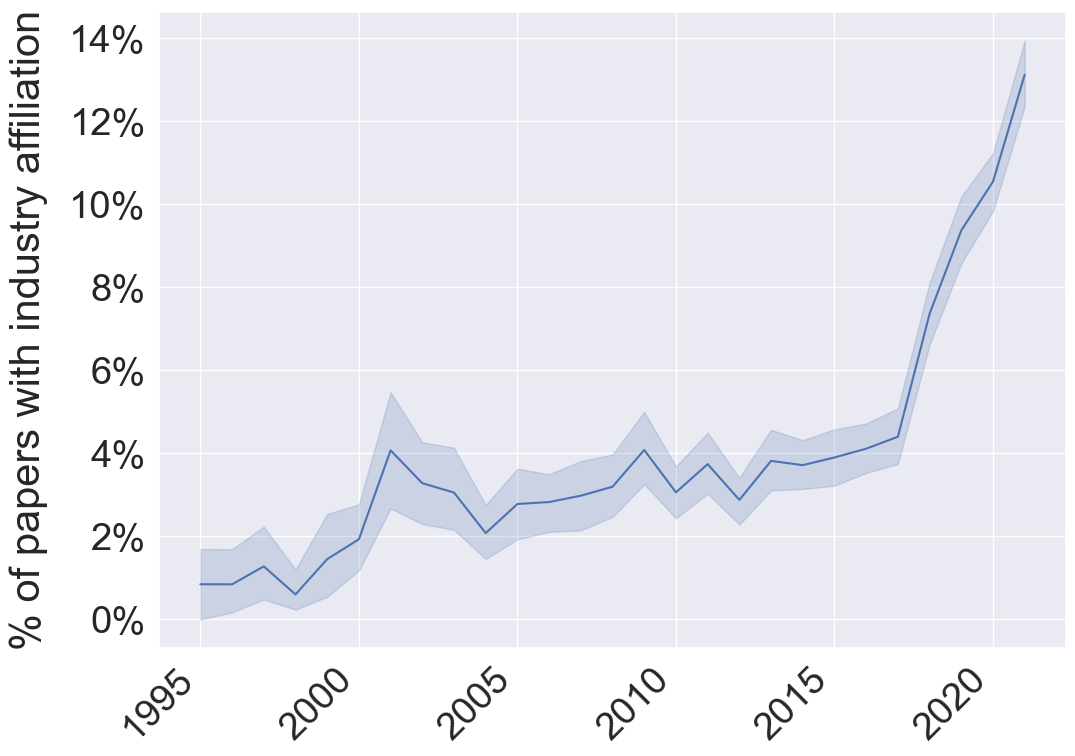

In [7]:
import matplotlib.ticker as mtick
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2.5)

# Plot the number of papers by year
plt.xticks(rotation=45, ha='right')
plt.ylabel('% of papers with industry affiliation', labelpad=labelpad)
ax = sns.lineplot(x='year', y='has_company_mention', data=df[(df['year'] >= 1995) & (df['year'] <= 2021)])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('')
plt.savefig(os.path.join(output_path, 'overall_relative_presence.pgf'), bbox_inches='tight')
plt.savefig(os.path.join(output_path, 'overall_relative_presence.pdf'), bbox_inches='tight')
plt.show()

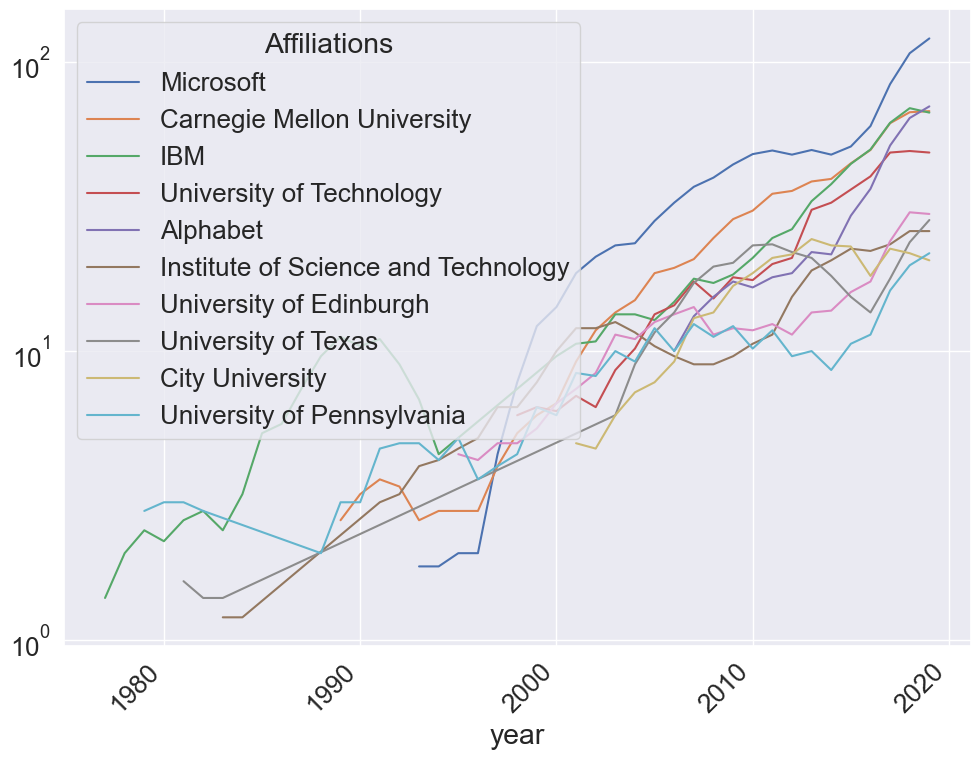

In [8]:
# Plot the number of papers mentioning each company over time
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.7)
plt.xticks(rotation=45, ha='right')
df['Affiliations'] = df["mentions_affiliations"]
test = df.groupby(['year', 'Affiliations']).count().reset_index()
test = test.pivot(index='year', columns='Affiliations', values='corpusid')
test = test.rolling(5).mean().shift(-3)
test = test.fillna(0)
test = test[test.sum().sort_values(ascending=False).head(10).index]
test = test[test > 1]
ax = sns.lineplot(data=test, dashes=False)
plt.yscale('log')

Text(0, 0.5, '')

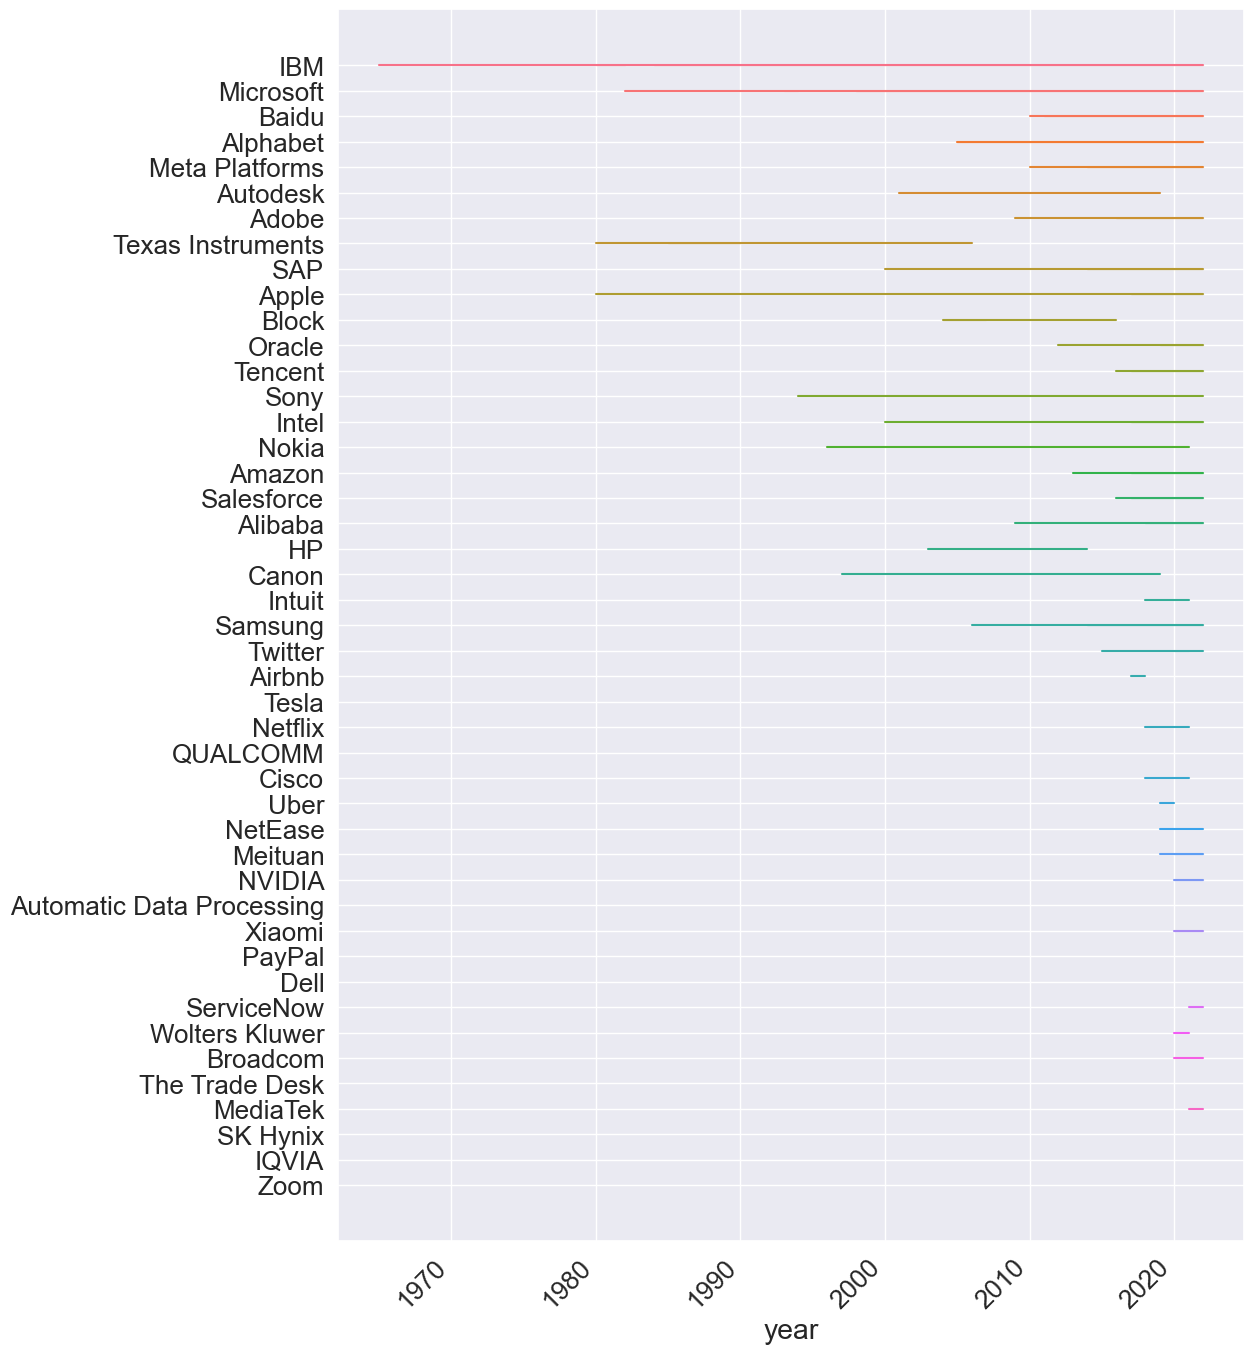

In [9]:
# Time ranges in which each company has published
sns.set(font_scale=1.7, rc={'figure.figsize':(11.7,16)})
plt.xticks(rotation=45, ha='right')
companies_df = df[df['orgtype'] == 'company']
ax = sns.lineplot(x=companies_df['year'], y=companies_df['mentions_affiliations'], hue=companies_df['mentions_affiliations'], legend=False)
plt.ylabel('')

### Who is the industry?

In [10]:
companies_df = df[df['orgtype'] == 'company']
companies_df['Affiliations'] = companies_df["mentions_affiliations"]
# Make the counts relative to the total number of papers in each year
companies_df['count'] = companies_df.groupby(['year'])['corpusid'].transform('count')
companies_df['count'] = companies_df['count'] / companies_df['count'].sum()
companies_df = companies_df.groupby(['year', 'Affiliations']).sum().reset_index()
companies_df = companies_df.pivot(index='year', columns='Affiliations', values='count')
companies_df = companies_df.rolling(5).mean().shift(-3)
companies_df = companies_df.fillna(0)
companies_df = companies_df[companies_df.sum().sort_values(ascending=False).head(10).index]
companies_df = companies_df[companies_df > 0.0001]
companies_df.sum()

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2172458360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_df['Affiliations'] = companies_df["mentions_affiliations"]
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2172458360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_df['count'] = companies_df.groupby(['year'])['corpusid'].transform('count')
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2172458360.py:5: SettingWithCopyWarn

Affiliations
Microsoft         0.124094
IBM               0.075256
Alphabet          0.068821
Meta Platforms    0.053747
Amazon            0.046946
Alibaba           0.034526
Tencent           0.034348
Baidu             0.022097
Adobe             0.016633
Samsung           0.016138
dtype: float64

In [11]:
companies_df = df[df['orgtype'] == 'university']
companies_df['Affiliations'] = companies_df["mentions_affiliations"]
# Make the counts relative to the total number of papers in each year
companies_df['count'] = companies_df.groupby(['year'])['corpusid'].transform('count')
companies_df['count'] = companies_df['count'] / companies_df['count'].sum()
companies_df = companies_df.groupby(['year', 'Affiliations']).sum().reset_index()
companies_df = companies_df.pivot(index='year', columns='Affiliations', values='count')
companies_df = companies_df.rolling(5).mean().shift(-3)
companies_df = companies_df.fillna(0)
companies_df = companies_df[companies_df.sum().sort_values(ascending=False).head(10).index]
companies_df = companies_df[companies_df > 0.0001]
companies_df.sum()

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2453847731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_df['Affiliations'] = companies_df["mentions_affiliations"]
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2453847731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_df['count'] = companies_df.groupby(['year'])['corpusid'].transform('count')
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/2453847731.py:5: SettingWithCopyWarn

Affiliations
Carnegie Mellon University              0.026296
University of Technology                0.019501
University of Texas                     0.012076
University of Edinburgh                 0.011480
City University                         0.011579
Institute of Science and Technology     0.011199
National University                     0.011239
University of Illinois                  0.010552
University of Science and Technology    0.010290
University of Cambridge                 0.009757
dtype: float64

### Where is the presence?

In [12]:
paper_counts = df['venue'].value_counts()
paper_counts_with_mentions = df['venue'][df['has_company_mention']].value_counts()
relative = paper_counts_with_mentions / paper_counts
relative = relative[relative.ne(1.0)].reindex(paper_counts_with_mentions.sort_values(ascending=False).index)
relative = relative[:15].sort_values(ascending=False)

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/558502832.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


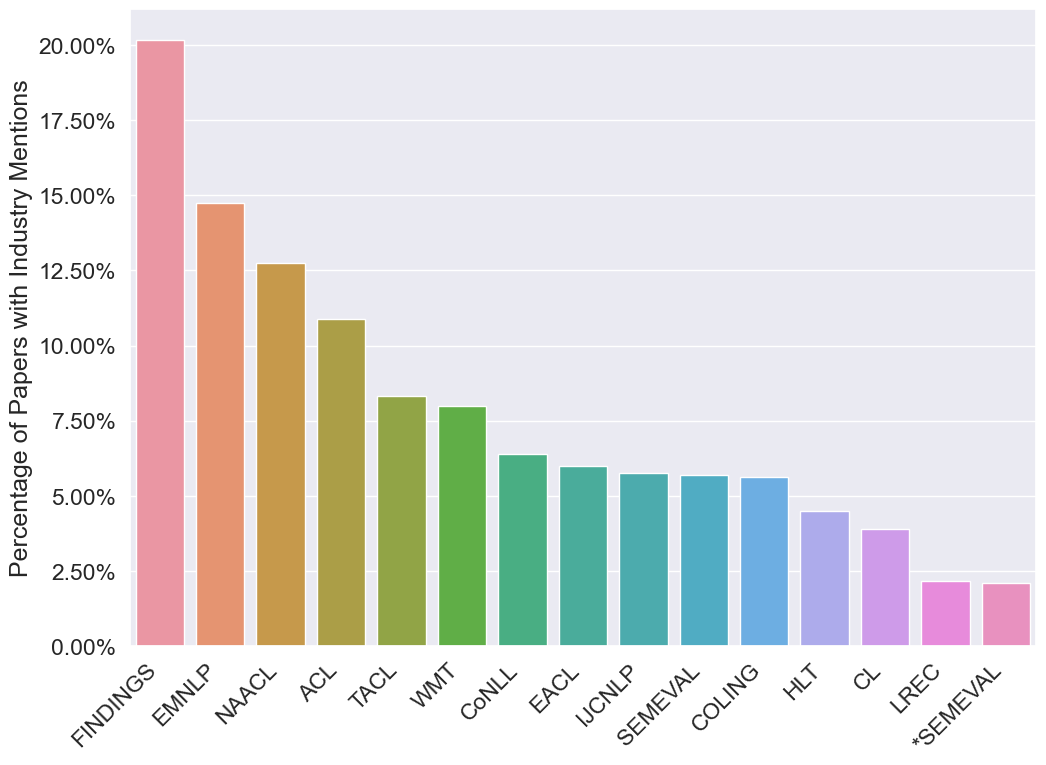

In [13]:
# Plot the relative presence of mentions in each venue
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Papers with Industry Mentions')
ax = sns.barplot(x=relative.index[:15], y=relative.values[:15])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
print()

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/4203756331.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, 0.0, '0.00%'),
 Text(0, 0.02, '2.00%'),
 Text(0, 0.04, '4.00%'),
 Text(0, 0.06, '6.00%'),
 Text(0, 0.08, '8.00%'),
 Text(0, 0.1, '10.00%'),
 Text(0, 0.12, '12.00%')]

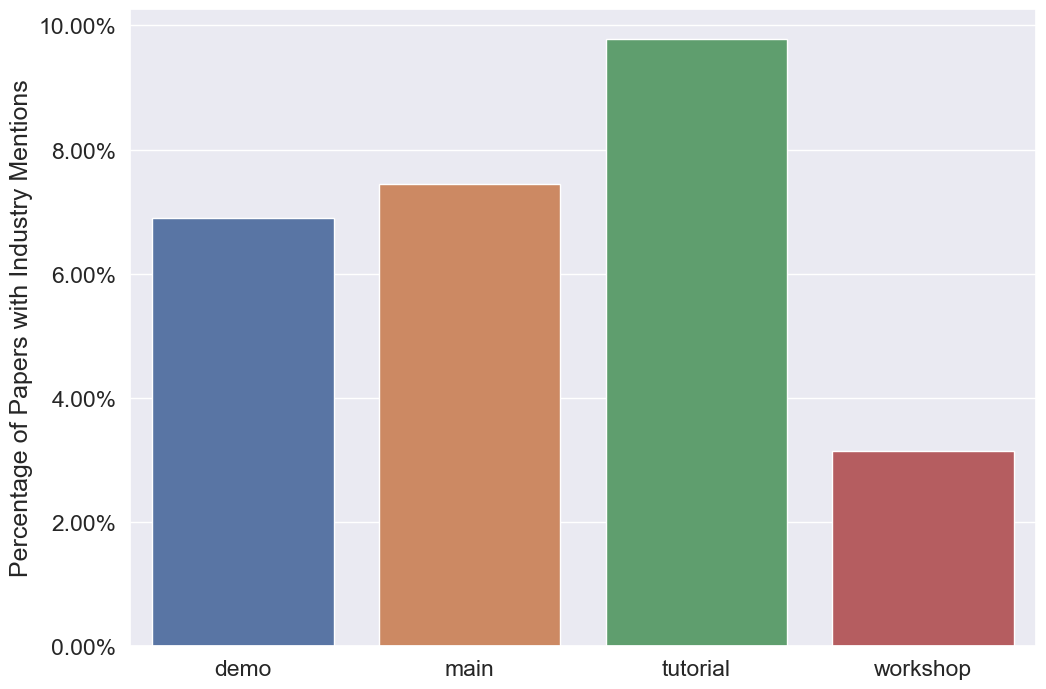

In [14]:
# Plot the number of papers by publicationtype
pl = df.groupby('publicationtype')['has_company_mention'].value_counts(normalize=True).rename('Percentage of Papers with Industry Mentions').reset_index()
pl = pl[pl['has_company_mention'] == True]
ax = sns.barplot( x='publicationtype', y='Percentage of Papers with Industry Mentions', data=pl)
vals = ax.get_yticks()
plt.xlabel('')
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

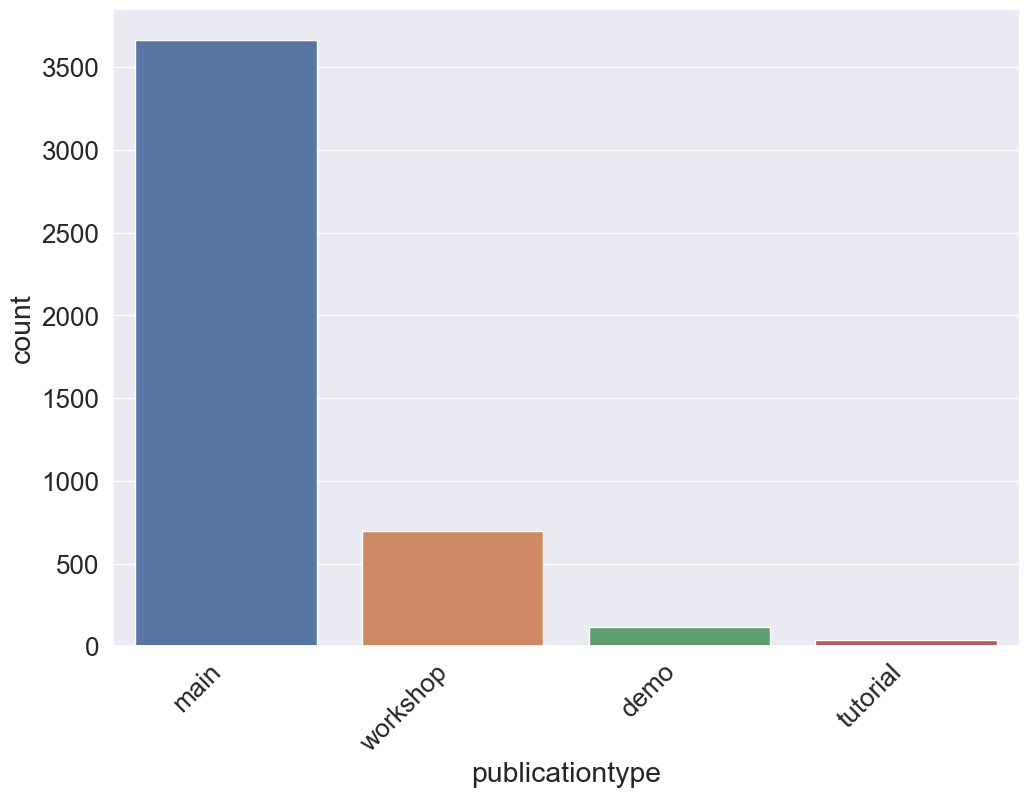

In [15]:
# Plot the number of papers with mentions per publicationtype
sns.set(font_scale=1.7)
plt.xticks(rotation=45, ha='right')
ax = sns.countplot(x=df['publicationtype'][df['has_company_mention']], order=df['publicationtype'][df['has_company_mention']].value_counts().iloc[:20].index)
print()

### How well cited are industry papers?

In [16]:
# Raw citation median and means
pd.options.display.float_format = "{:,.2f}".format

# df_only_companies = df[df['orgtype'] == 'company']

df['Affiliation Mentions with Others'] = df["mentions_affiliations"].replace(np.nan, 'Others')
mean_citations = df.groupby('Affiliation Mentions with Others')['citationcount'].mean()
median_citations = df.groupby('Affiliation Mentions with Others')['citationcount'].median()
non_norm = pd.merge(mean_citations, median_citations, on='Affiliation Mentions with Others').rename(columns={'citationcount_x': 'Mean', 'citationcount_y': 'Median'})
non_norm.loc[(non_norm!=0).any(axis=1)]

# Add h-index
df['h-index'] = df.groupby('mentions_affiliations')['citationcount'].transform(lambda x: ( x >= x.rank(ascending=False, method='first') ).sum() )
hindex = df.groupby('Affiliation Mentions with Others')['h-index'].max().sort_values(ascending=False)
hindex

Affiliation Mentions with Others
Microsoft                        123.00
Alphabet                         104.00
Carnegie Mellon University        95.00
IBM                               94.00
Stanford University               81.00
                                  ...  
Technische Universität München     0.00
Tokai University                   0.00
Tokyo Keizai University            0.00
Örebro University                  0.00
Others                              NaN
Name: h-index, Length: 1086, dtype: float64

In [17]:
# Normalize the number of citations by time
df['citationcount_norm'] = df['citationcount'] / (2023 - df['year'])
df['citationcount_norm']

# Normalized citation median and means
df['Affiliation Mentions with Others'] = df["mentions_affiliations"].replace(np.nan, 'Others')
# Take only companies
df_only_companies = df[df['orgtype'] == 'company']

mean_citations = df_only_companies.groupby('Affiliation Mentions with Others')['citationcount_norm'].mean()
median_citations = df_only_companies.groupby('Affiliation Mentions with Others')['citationcount_norm'].median()
norm = pd.merge(mean_citations, median_citations, on='Affiliation Mentions with Others').rename(columns={'citationcount_norm_x': 'Time Norm.    Mean$^*$', 'citationcount_norm_y': 'Time Norm. Median$^*$'})
out = pd.merge(non_norm, norm, on='Affiliation Mentions with Others')

# Merge h-index
out = pd.merge(out, hindex, on='Affiliation Mentions with Others')

# Add the mean
mean = out.mean()

# Filter top according to h-index but keep the mean
out = out.sort_values(by='h-index', ascending=False).head(40)

# Convert h-index to int
out['h-index'] = out['h-index'].astype(int)

# Sort by h-index
out = out.sort_values(by='h-index', ascending=False)

# Add mean back
out.loc['Mean$^\dagger$'] = mean

# Rename column h-index to h-index ($\downarrow$)
out = out.rename(columns={'h-index': 'h-index ($\\downarrow$)'})

out

,Mean,Median,Time Norm. Mean$^*$,Time Norm. Median$^*$,h-index ($\downarrow$)
Affiliation Mentions with Others,,,,,
Microsoft,61.32,16.00,9.05,2.82,123.00
Alphabet,81.62,21.00,15.48,4.50,104.00
IBM,74.22,11.00,6.53,1.60,94.00
Meta Platforms,113.55,20.00,25.47,8.00,77.00
Tencent,25.91,9.00,6.52,3.50,42.00
Baidu,32.79,8.00,7.01,2.50,36.00
Amazon,21.19,4.00,5.64,1.50,35.00
Alibaba,16.16,6.00,4.92,2.50,30.00
Salesforce,36.67,12.00,11.14,5.00,28.00


In [18]:
# Output the number of citations per company to latex
out = out.loc[(out>3).any(axis=1)]
out.to_latex(os.path.join(output_path, 'citations_full_companies.tex'), escape=False)

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/3496960322.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  out.to_latex(os.path.join(output_path, 'citations_full_companies.tex'), escape=False)


In [19]:
# Normalize the number of citations by time
df['citationcount_norm'] = df['citationcount'] / (2023 - df['year'])
df['citationcount_norm']

# Normalized citation median and means
df['Affiliation Mentions with Others'] = df["mentions_affiliations"].replace(np.nan, 'Others')
# Take only companies
df_only_companies = df[df['orgtype'] == 'university']

mean_citations = df_only_companies.groupby('Affiliation Mentions with Others')['citationcount_norm'].mean()
median_citations = df_only_companies.groupby('Affiliation Mentions with Others')['citationcount_norm'].median()
norm = pd.merge(mean_citations, median_citations, on='Affiliation Mentions with Others').rename(columns={'citationcount_norm_x': 'Time Norm.    Mean$^*$', 'citationcount_norm_y': 'Time Norm. Median$^*$'})
out = pd.merge(non_norm, norm, on='Affiliation Mentions with Others')

# Merge h-index
out = pd.merge(out, hindex, on='Affiliation Mentions with Others')

# Add the mean
mean = out.mean()

# Filter top according to h-index but keep the mean
out = out.sort_values(by='h-index', ascending=False).head(40)

# Convert h-index to int
out['h-index'] = out['h-index'].astype(int)

# Sort by h-index
out = out.sort_values(by='h-index', ascending=False)

# Add mean back
out.loc['Mean$^\dagger$'] = mean

# Rename column h-index to h-index ($\downarrow$)
out = out.rename(columns={'h-index': 'h-index ($\\downarrow$)'})

out

,Mean,Median,Time Norm. Mean$^*$,Time Norm. Median$^*$,h-index ($\downarrow$)
Affiliation Mentions with Others,,,,,
Carnegie Mellon University,65.06,15.00,9.33,2.14,95.00
Stanford University,129.73,21.00,16.24,3.20,81.00
University of Edinburgh,54.34,18.00,6.03,2.00,71.00
University of Pennsylvania,99.34,12.00,6.38,1.48,67.00
University of Texas,36.16,11.00,3.97,1.85,64.00
University of Cambridge,45.19,13.00,6.12,2.04,62.00
University of Technology,25.45,6.00,3.23,1.00,60.00
Johns Hopkins University,54.09,15.50,7.74,2.92,59.00
University of Washington,59.19,17.00,11.35,3.62,58.00


In [20]:
# Output the number of citations per company to latex
out = out.loc[(out>3).any(axis=1)]
out.to_latex(os.path.join(output_path, 'citations_full_universities.tex'), escape=False)

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_43240/1541087798.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  out.to_latex(os.path.join(output_path, 'citations_full_universities.tex'), escape=False)


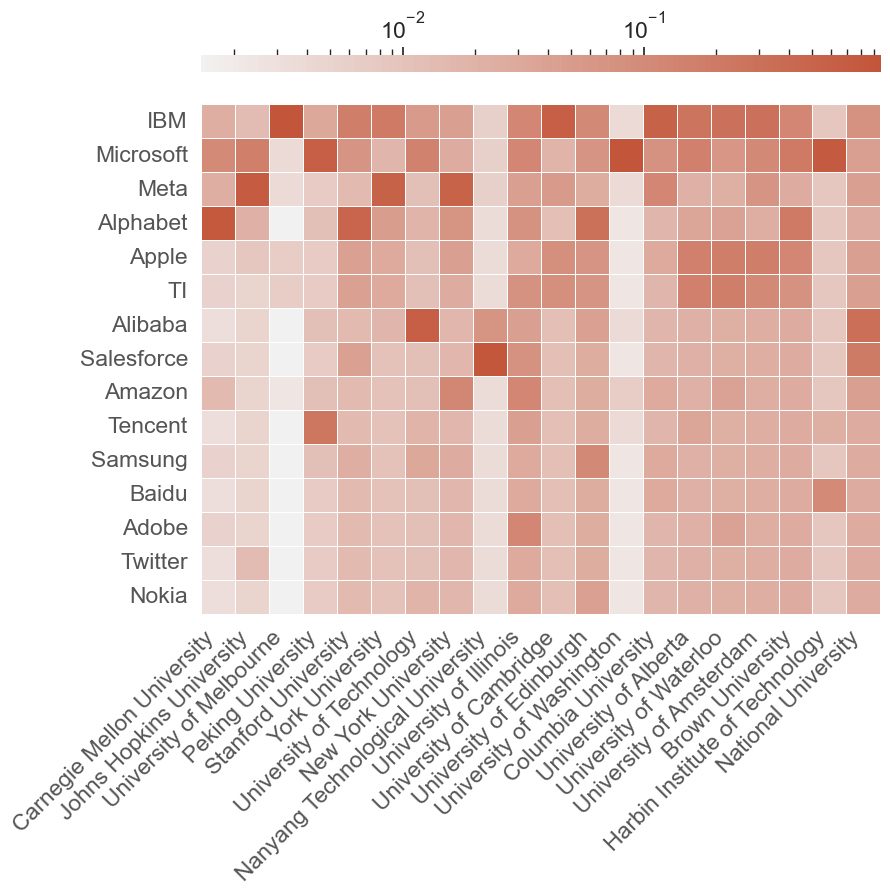

In [ ]:
# Plot which companies are mentioned with which other companies
from itertools import combinations
from matplotlib.colors import LogNorm, Normalize

sns.set(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)}, style='white')

# Filter companies only
df_only_companies = df[df['orgtype'] == 'company']
# Filter universities only
df_only_universities = df[df['orgtype'] == 'university'] 

# Rename mentions_affiliations to Affiliations
df['Affiliations'] = df["mentions_affiliations"]
# Count the number of times each company is mentioned with a university
grouped = df[['Affiliations', 'corpusid', 'orgtype']].groupby('corpusid').agg(lambda x: list(x))
grouped['aff'] = grouped['Affiliations'].apply(lambda l: list(combinations(l, 2)))
grouped = grouped.explode('aff')
grouped = grouped[grouped.aff.str.len() > 0]
mask = grouped.orgtype.apply(lambda x: 'university' in x and 'company' in x)
grouped = grouped[mask]
# Filter out companies that are mentioned with themselves
grouped = grouped[grouped['aff'].apply(lambda x: x[0] != x[1])]

# Compute the correlation matrix
corr = pd.DataFrame(grouped['aff'].to_list(), columns=['Affiliations_1','Affiliations_2'])
corr['Affiliations_1'] = corr['Affiliations_1'][corr['Affiliations_1'].isin(df_only_companies['Affiliations'])]
corr['Affiliations_2'] = corr['Affiliations_2'][corr['Affiliations_2'].isin(df_only_universities['Affiliations'])]
co_mat = pd.crosstab(corr['Affiliations_1'], corr['Affiliations_2'])
# Only keep the top 10 universities
co_mat = co_mat.loc[:, co_mat.sum(axis=0).sort_values(ascending=False).index[:20]]
# Only keep the top 10 companies
co_mat = co_mat.loc[co_mat.sum(axis=1).sort_values(ascending=False).index[:15], :]
# Apply a softmax with a temperature of 0.5 to the rows
co_mat = co_mat.apply(lambda x: np.exp(x/2) / np.exp(x/2).sum(), axis=0)
# Replace 'Meta Platforms' with 'Meta' and 'Texas Instruments' with 'TI'
co_mat = co_mat.rename(index={'Meta Platforms': 'Meta', 'Texas Instruments': 'TI'})
# Generate the trianguler mask
# mask = np.triu(np.ones_like(co_mat, dtype=bool), k=1)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Make heatmap logarithmic
ax = sns.heatmap(co_mat, cmap=cmap, vmax=1, center=0, # mask=mask,
            square=True, linewidths=.5, norm=LogNorm(), cbar_kws = dict(use_gridspec=False,location="top", shrink=.75, aspect=40))
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right', color='#555')
plt.yticks(ha='right', color='#555')
plt.savefig(os.path.join(output_path, 'collaborations_companies_universities.pdf'), bbox_inches='tight')
print()

### What is industry research focused on?

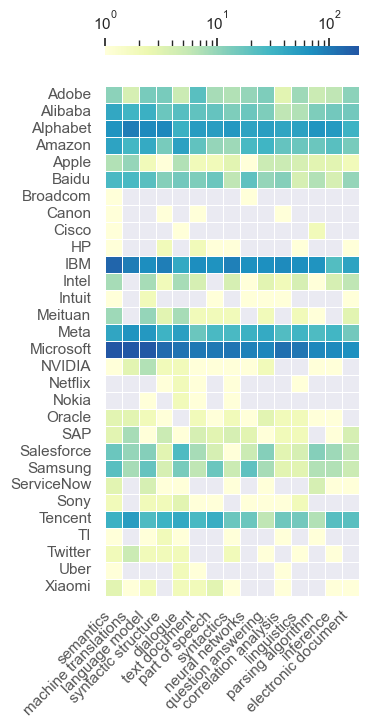

In [23]:
import matplotlib
sns.set(font_scale=1.)
# Get topics
topics_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_topics.csv'))
topics_df = affiliations_df.merge(topics_df, on='corpusid')
topics_df = papers_df.merge(topics_df, on='corpusid')
topics_df['has_company_mention'] = df['orgtype'] == 'company'

# Filter companies only
topics_df = topics_df[topics_df['orgtype'] == 'company']
# Filter out "natural language processing" and "natural languages" topics
topics_df_filtered = topics_df[~topics_df['topic'].str.contains('natural language', na=False)]

# normalize mentions_affiliations by the number of papers from each company

# Take the top 15 topics from topics_df and remove all others from topics_df
top_topics = topics_df_filtered['topic'].value_counts().iloc[:30].index
# Filter out all topics that are not in the top 10
topics_df_filtered = topics_df_filtered[topics_df_filtered['topic'].isin(top_topics)]
# Take the top 30 companies 
top_companies = topics_df_filtered['mentions_affiliations'].value_counts().iloc[:30].index
# Filter out all companies that are not in the top 30
topics_df_filtered = topics_df_filtered[topics_df_filtered['mentions_affiliations'].isin(top_companies)]
# Create the correlation matrix
co_mat = pd.pivot_table(topics_df_filtered, values='corpusid', index=['topic'], columns=['mentions_affiliations'], aggfunc='count', fill_value=0)
# Get sum over all topics
co_mat['sum'] = co_mat.sum(axis=1)
# Sort by sum
co_mat = co_mat.sort_values(by='sum', ascending=False)
# Remove sum column
co_mat = co_mat.drop(columns=['sum'])
# Take the top 10 topics
co_mat = co_mat.iloc[:15]
# Swap x and y axis
co_mat = co_mat.T
# Replace 'Meta Platforms' with 'Meta' and 'Texas Instruments' with 'TI'
co_mat = co_mat.rename(index={'Meta Platforms': 'Meta', 'Texas Instruments': 'TI'})
# Generate the heatmap
sns.heatmap(co_mat, cmap='YlGnBu', vmax=185, center=120,
            square=True, linewidths=.5, cbar_kws=dict(use_gridspec=False,location="top", aspect=30, shrink=0.28), norm=matplotlib.colors.LogNorm())
plt.xticks(rotation=45, ha='right', color='#555')
plt.yticks(ha='right', color='#555')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(output_path, 'companies_topics_heatmap.pgf'), bbox_inches='tight')
plt.savefig(os.path.join(output_path, 'companies_topics_heatmap.pdf'), bbox_inches='tight')

print()

/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_31238/3975521485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df_filtered['has_company_mention'] = df['orgtype'] == 'company'
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_31238/3975521485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df_filtered['has_company_mention'] = topics_df_filtered['has_company_mention'].fillna(0)


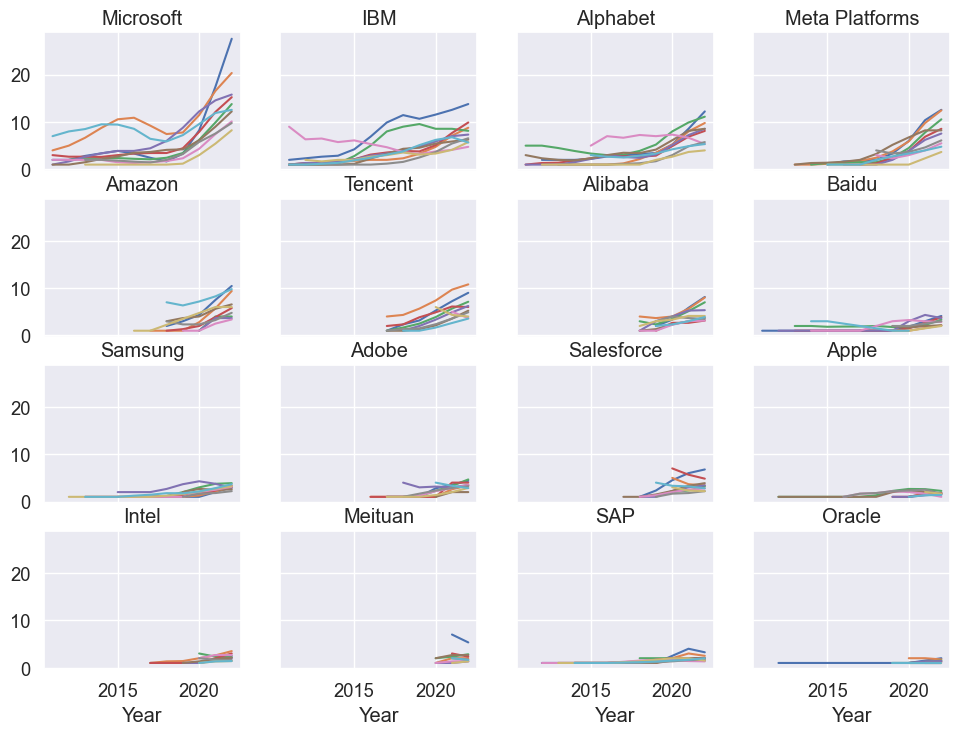

In [251]:
# Get topics
topics_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_topics.csv'))
topics_df = affiliations_df.merge(topics_df, on='corpusid')
topics_df = papers_df.merge(topics_df, on='corpusid')
topics_df_filtered = topics_df[~topics_df['topic'].str.contains('natural language', na=False)]
# Only companies
topics_df_filtered['has_company_mention'] = df['orgtype'] == 'company'
# Replace nan with 0
topics_df_filtered['has_company_mention'] = topics_df_filtered['has_company_mention'].fillna(0)
# Make a plot grid with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True)

i = 0
j = 0

# for each company in the top 16 companies make a plot
for idx, company in enumerate(top_companies[:16]):
    i = idx // 4
    j = idx % 4
    # Take only microsoft papers
    out = topics_df_filtered[topics_df_filtered['mentions_affiliations'] == company]
    # Counting and filtering
    out = out.groupby(['year', 'topic']).count().reset_index()
    out = out.pivot(index='year', columns='topic', values='corpusid')
    # Take years only larger than
    out = out[out.index > 2010]
    # Take the topics that have most standard deviation over the years
    out = out[out.std(axis=0).sort_values(ascending=False).index[:10]]
    # Add moving average
    out = out.rolling(5, win_type='triang', min_periods=1).mean()
    sns.lineplot(data=out, dashes=False, ax=axes[i, j], legend=False)
    axes[i, j].set_title(company)
    # plt.ylabel('Number of Industry Mentions')
    axes[i, j].set_xlabel('Year')
    # plt.yscale('log')
    plt.autoscale(False)


/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_31238/3811276896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df_filtered['has_company_mention'] = df['orgtype'] == 'company'
/var/folders/0q/jxqcp_wn2gsgsgpjxf_2gvr00000gn/T/ipykernel_31238/3811276896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df_filtered['has_company_mention'] = topics_df_filtered['has_company_mention'].fillna(0)


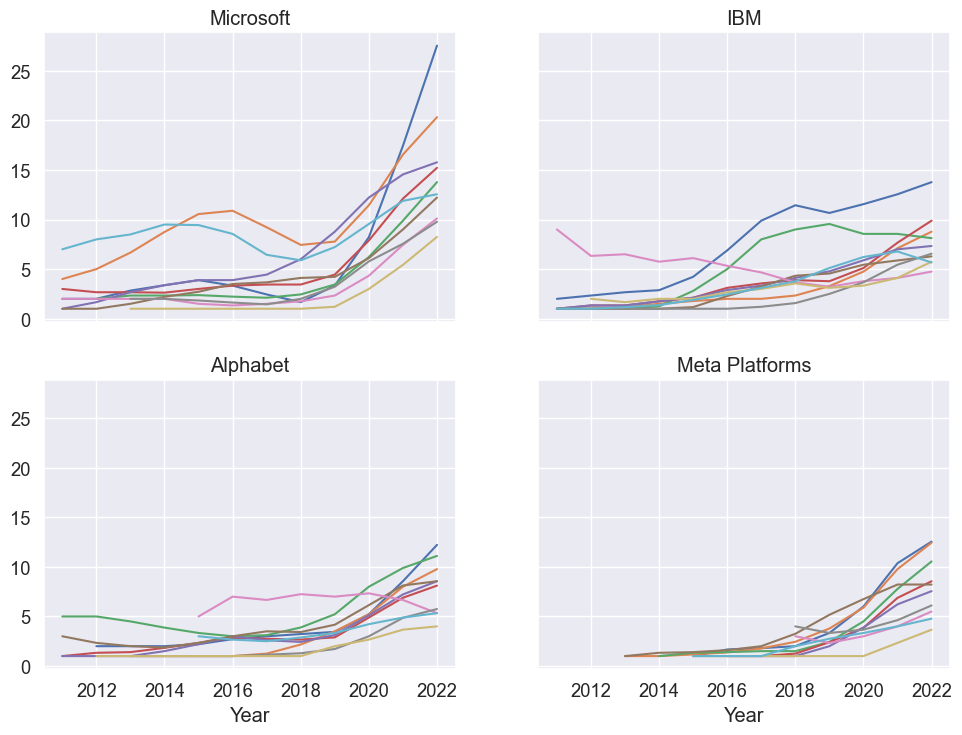

In [252]:
# Get topics
topics_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_topics.csv'))
topics_df = affiliations_df.merge(topics_df, on='corpusid')
topics_df = papers_df.merge(topics_df, on='corpusid')
topics_df_filtered = topics_df[~topics_df['topic'].str.contains('natural language', na=False)]
# Only companies
topics_df_filtered['has_company_mention'] = df['orgtype'] == 'company'
# Replace nan with 02
topics_df_filtered['has_company_mention'] = topics_df_filtered['has_company_mention'].fillna(0)
# Make a plot grid with 4 rows and 4 columns
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

i = 0
j = 0

# for each company in the top 16 companies make a plot
for idx, company in enumerate(top_companies[:4]):
    i = idx // 2
    j = idx % 2
    # Take only microsoft papers
    out = topics_df_filtered[topics_df_filtered['mentions_affiliations'] == company]
    # Counting and filtering
    out = out.groupby(['year', 'topic']).count().reset_index()
    out = out.pivot(index='year', columns='topic', values='corpusid')
    # Take years only larger than
    out = out[out.index > 2010]
    # Take the topics that have most standard deviation over the years
    out = out[out.std(axis=0).sort_values(ascending=False).index[:10]]
    # Add moving average
    out = out.rolling(5, win_type='triang', min_periods=1).mean()
    sns.lineplot(data=out, dashes=False, ax=axes[i, j], legend=False)
    axes[i, j].set_title(company)
    # plt.ylabel('Number of Industry Mentions')
    axes[i, j].set_xlabel('Year')
    # plt.yscale('log')
    plt.autoscale(False)
    # plt.legend(loc='center right', title='Topic')


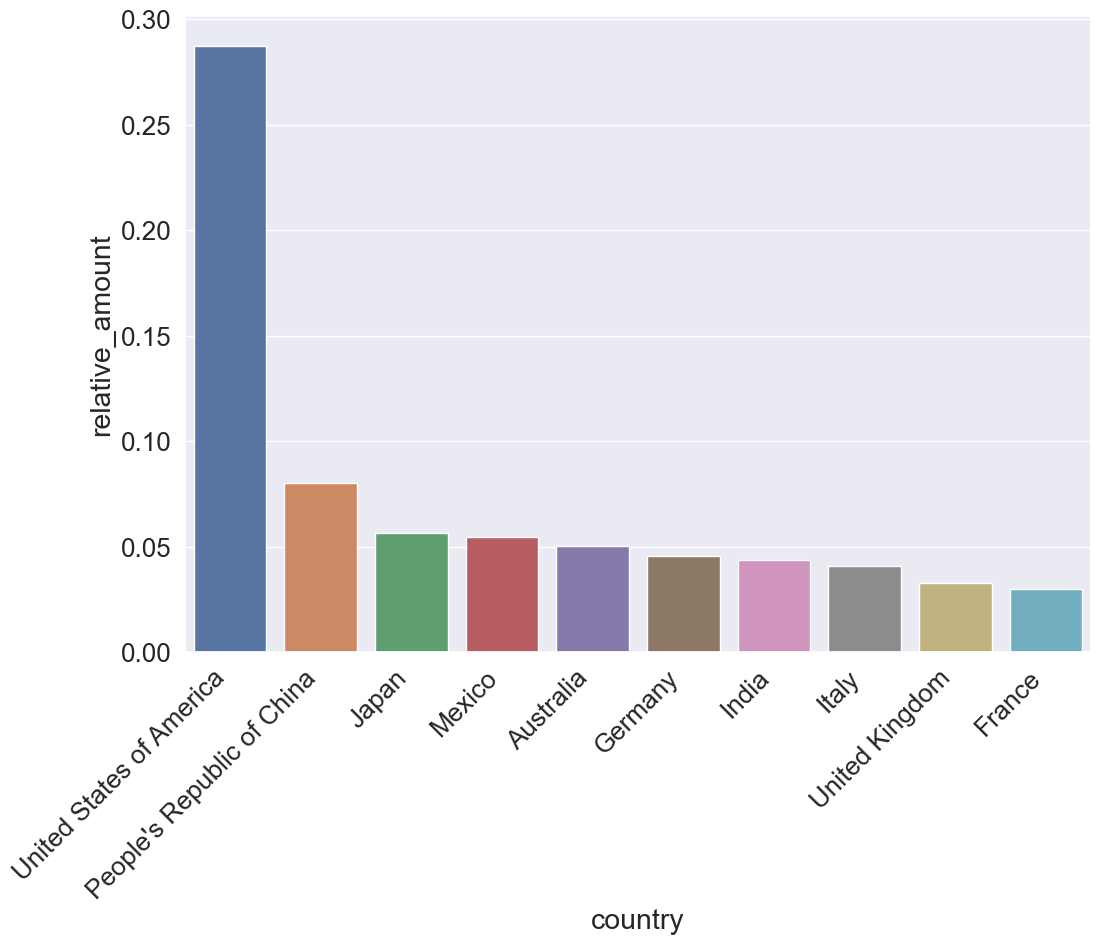

In [72]:
countries_df = pd.read_csv(os.path.join(output_path, 's2_papers_to_countries.csv'))

# Get the relative amount of papers per country
countries_df = countries_df.groupby('country').count().reset_index()
countries_df = countries_df.sort_values(by='corpusid', ascending=False)
countries_df['corpusid'] = countries_df['corpusid'] / countries_df['corpusid'].sum()
countries_df = countries_df.rename(columns={'corpusid': 'relative_amount'})

# Plot counts for the top 10 countries
sns.set(font_scale=1.7, rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45, ha='right')
ax = sns.barplot(x='country', y='relative_amount', data=countries_df.head(10))

In [74]:
countries_df.sort_values(by='relative_amount', ascending=False).head(10)

,country,relative_amount,aclid
102,United States of America,0.29,5334
73,People's Republic of China,0.08,1486
45,Japan,0.06,1047
61,Mexico,0.05,1013
4,Australia,0.05,936
31,Germany,0.05,847
38,India,0.04,817
43,Italy,0.04,763
101,United Kingdom,0.03,613
29,France,0.03,554
